In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.io import arff
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import os, shutil
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

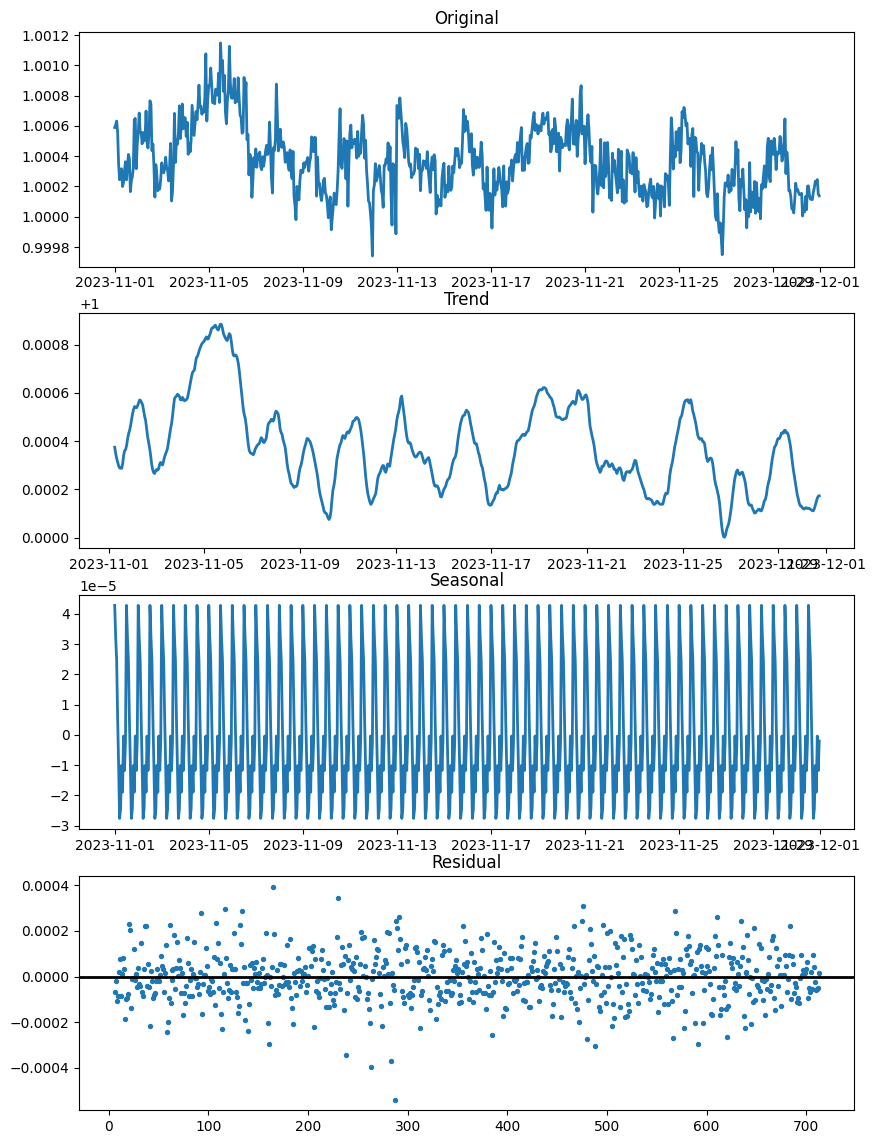

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
# load dataset
# file_list=['BTCUSD-all','BTCUSD-N2Y','BTCUSD-N4Y',
#            'ETHUSD-all','ETHUSD-N2Y','ETHUSD-N4Y',           
#            'USDTUSD-all','USDTUSD-N2Y','USDTUSD-N4Y',  
#            'BNBUSD-all','BNBUSD-N2Y','BNBUSD-N4Y']

# file_list=['BTCUSD-1m1h','ETHUSD-1m1h','USDTUSD-1m1h','BNBUSD-1m1h']

seasonal_period_list=[12]

file_list=['USDTUSD-1m1h']
for file in file_list:
    for seasonal_period in seasonal_period_list:
        # google stock price is daily, so
        df=pd.read_csv('../Data/'+file+'.csv')        
        #df['Close'] = np.log(df['Close'])
        
        df["Datetime"] = pd.to_datetime(df["Datetime"])
        # Decompose the 'Close' column #multiplicative or additive
        Mmodel='additive'
        decomposition = seasonal_decompose(df['Close'], model=Mmodel, period=seasonal_period)

        # Extract the components
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid

        # Plot the components
        fig, axes = plt.subplots(4, 1, figsize=(10, 14))  # Set the figure size

        # Plot the original series
        axes[0].plot(df["Datetime"],df['Close'], linewidth=2)  # Set the line width (point size)
        axes[0].set_title('Original')

        # Plot the trend component
        axes[1].plot(df["Datetime"],trend, linewidth=2)
        axes[1].set_title('Trend')

        # Plot the seasonal component
        axes[2].plot(df["Datetime"],seasonal, linewidth=2)
        axes[2].set_title('Seasonal')

        # Plot the residual component
        axes[3].scatter(residual.index, residual, s=8)
        axes[3].axhline(y=0, color='k', linestyle='-', linewidth=2)  # Horizontal line at y=0
        axes[3].set_title('Residual')

        
        
        fig_Name=f'figure/{file} P{str(seasonal_period)} {Mmodel} TimeSeries.jpg'
        plt.savefig(fig_Name)
        plt.show()